# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [22]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [23]:
# Importing the file porter_data_1.csv
from google.colab import files
uploaded = files.upload()

Saving porter_data_1.csv to porter_data_1 (1).csv


In [24]:
porter_data= pd.read_csv('porter_data_1.csv')
porter_data_1=porter_data

In [25]:
porter_data.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [26]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter_data['created_at'] = pd.to_datetime(porter_data['created_at'], errors='coerce')
porter_data['actual_delivery_time'] = pd.to_datetime(porter_data['actual_delivery_time'], errors='coerce')


In [27]:
print(porter_data.dtypes[['created_at', 'actual_delivery_time']])

created_at              datetime64[ns]
actual_delivery_time    datetime64[ns]
dtype: object


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [28]:
porter_data.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [29]:
# Convert categorical features to category type

porter_data['market_id'] = porter_data['market_id'].astype('category')
porter_data['store_primary_category'] = porter_data['store_primary_category'].astype('category')
porter_data['order_protocol'] = porter_data['order_protocol'].astype('category')

In [30]:
print(porter_data.dtypes[['market_id', 'store_primary_category', 'order_protocol']])


market_id                 category
store_primary_category    category
order_protocol            category
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [31]:
# Calculate time taken in minutes
porter_data['delivery_duration'] = (porter_data['actual_delivery_time'] - porter_data['created_at']).dt.total_seconds() / 60


In [32]:
print(porter_data[['created_at', 'actual_delivery_time', 'delivery_duration']].head())


           created_at actual_delivery_time  delivery_duration
0 2015-02-06 22:24:17  2015-02-06 23:11:17               47.0
1 2015-02-10 21:49:25  2015-02-10 22:33:25               44.0
2 2015-02-16 00:11:35  2015-02-16 01:06:35               55.0
3 2015-02-12 03:36:46  2015-02-12 04:35:46               59.0
4 2015-01-27 02:12:36  2015-01-27 02:58:36               46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [33]:
# Extract the hour and day of week from the 'created_at' timestamp
porter_data['hour']=porter_data['created_at'].dt.hour
porter_data['day_of_week']=porter_data['created_at'].dt.day_of_week



In [36]:
print(porter_data[['hour', 'day_of_week']].head())


   hour  day_of_week
0    22            4
1    21            1
2     0            0
3     3            3
4     2            1


In [37]:
porter_data.drop(columns=['created_at', 'actual_delivery_time'], inplace=True)


In [38]:
# Create a categorical feature 'isWeekend'
porter_data['isWeekend'] = porter_data['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
porter_data['isWeekend'] = porter_data['isWeekend'].astype('category')

In [39]:
print(porter_data[['day_of_week', 'isWeekend']].head(10))


   day_of_week isWeekend
0            4         0
1            1         0
2            0         0
3            3         0
4            1         0
5            4         0
6            6         1
7            5         1
8            5         1
9            5         1


In [ ]:
# Drop unnecessary columns


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [40]:
# Define target variable (y) and features (X)

y = porter_data['delivery_duration']
X = porter_data.drop(columns=['delivery_duration'])

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [41]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (140621, 15)
X_test shape: (35156, 15)
y_train shape: (140621,)
y_test shape: (35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [42]:
# Define numerical and categorical columns for easy EDA and data manipulation

# Separate numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
Categorical columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

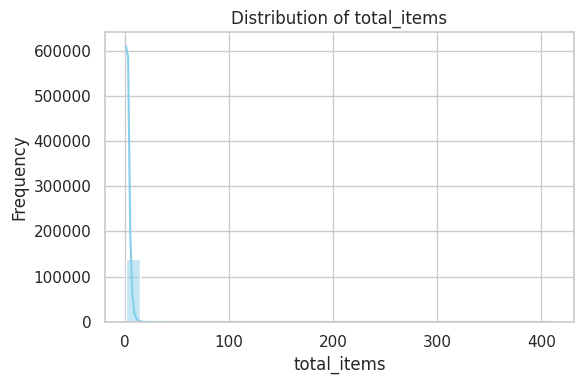

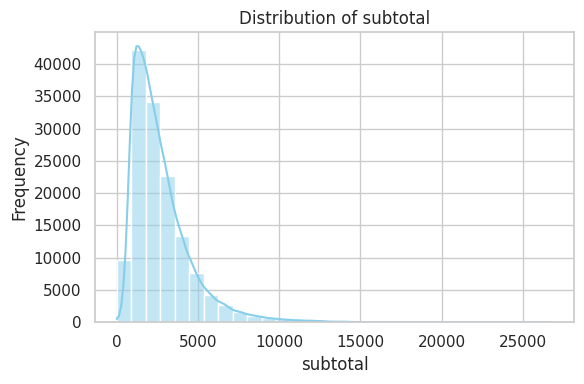

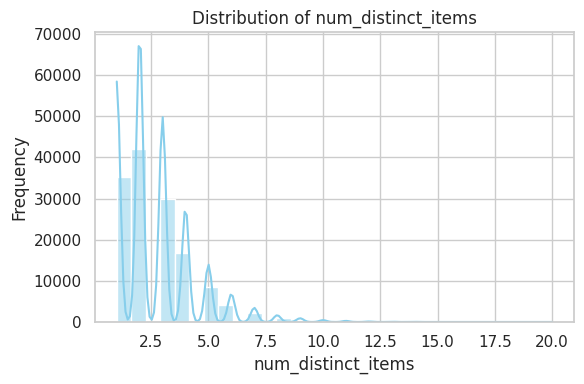

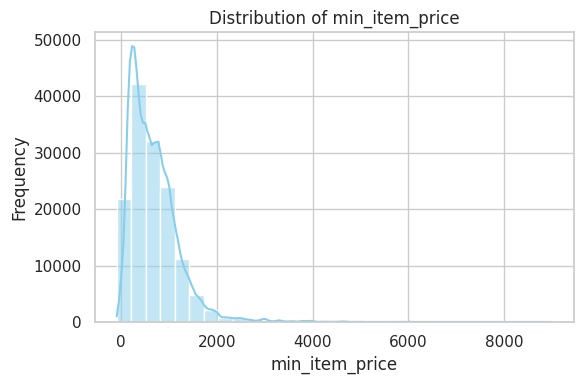

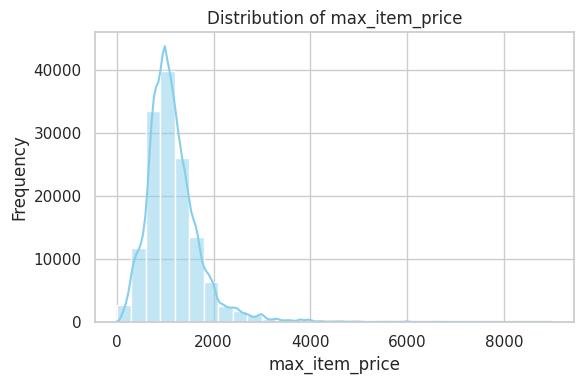

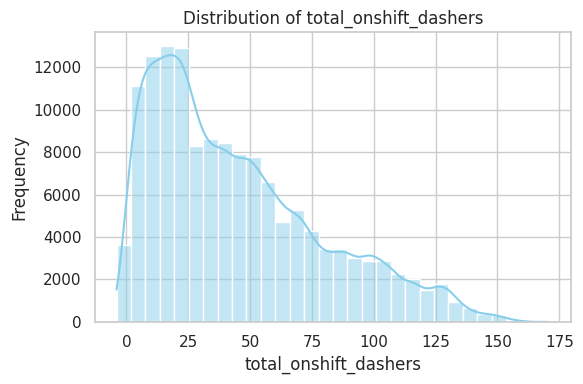

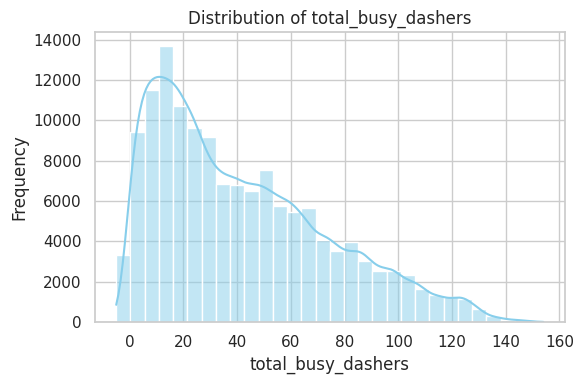

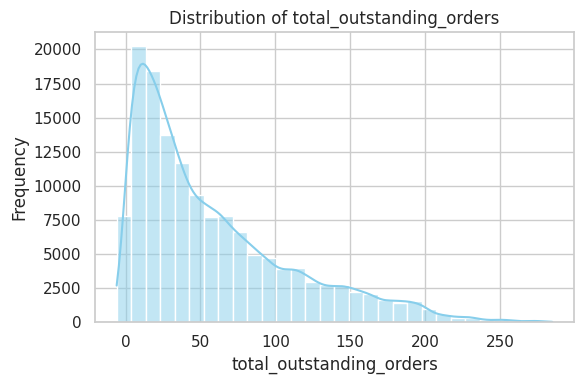

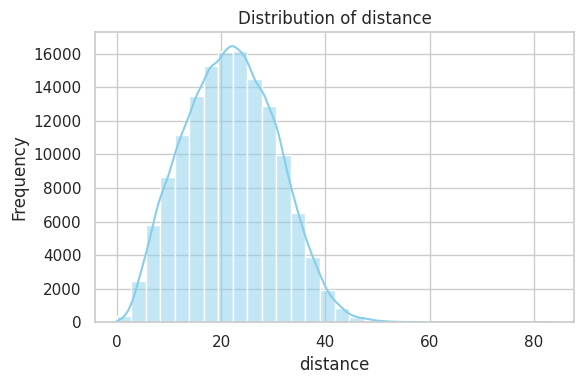

In [43]:
# Plot distributions for all numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot histograms for all numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(X_train[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

/tmp/ipython-input-44-4081067638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=X_train, palette='pastel')


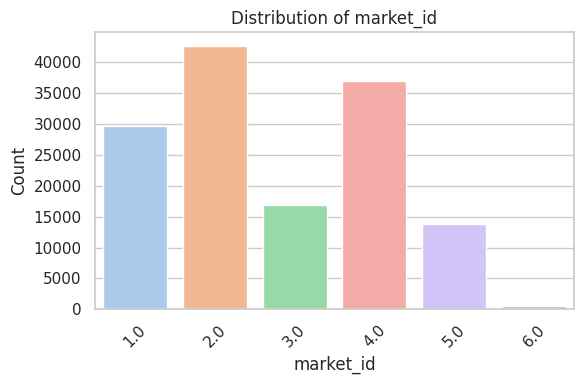

/tmp/ipython-input-44-4081067638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=X_train, palette='pastel')


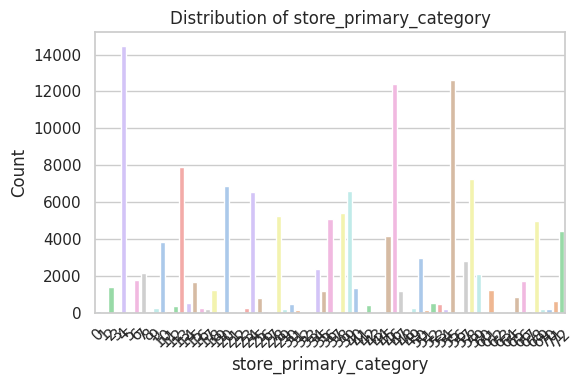

/tmp/ipython-input-44-4081067638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=X_train, palette='pastel')


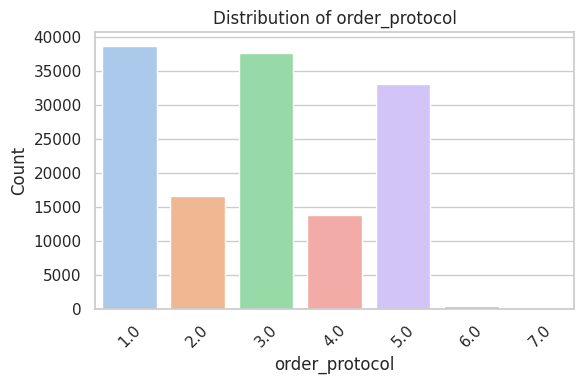

/tmp/ipython-input-44-4081067638.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=X_train, palette='pastel')


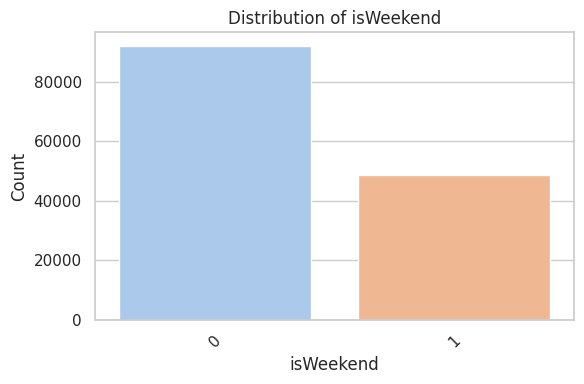

In [44]:
# Distribution of categorical columns
# Plot bar charts for all categorical columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=X_train, palette='pastel')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

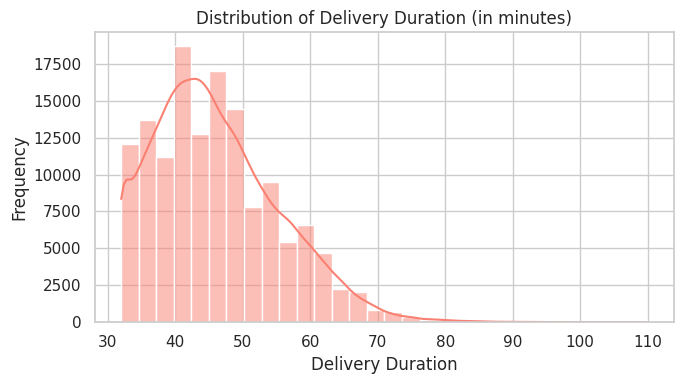

In [45]:
# Distribution of time_taken
plt.figure(figsize=(7, 4))
sns.histplot(y_train, bins=30, kde=True, color='salmon')
plt.title('Distribution of Delivery Duration (in minutes)')
plt.xlabel('Delivery Duration')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


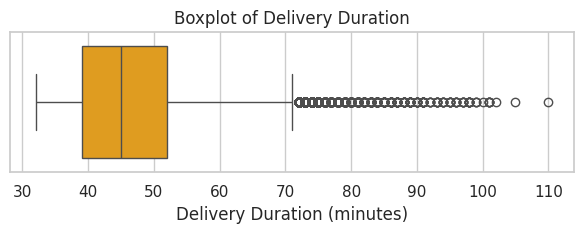

In [46]:
# Boxplot for Outlier Detection
plt.figure(figsize=(6, 2.5))
sns.boxplot(x=y_train, color='orange')
plt.title('Boxplot of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

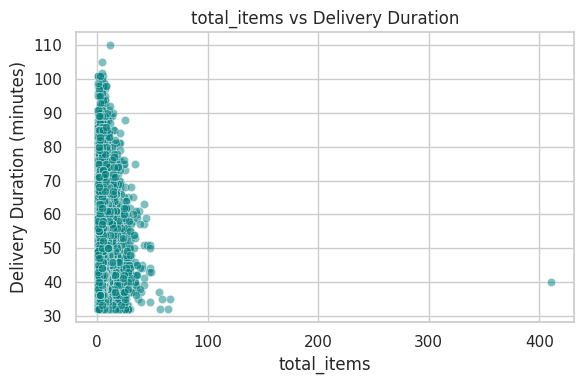

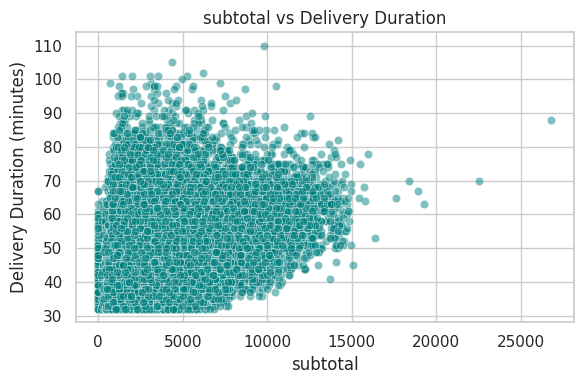

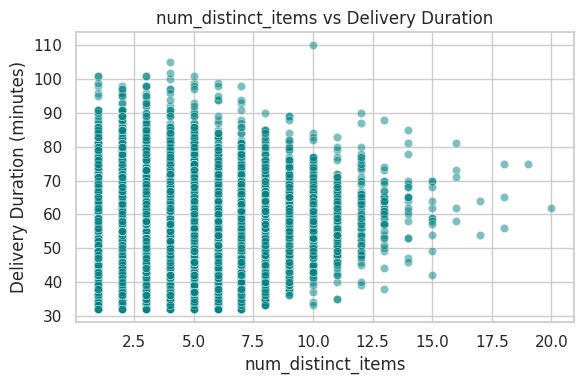

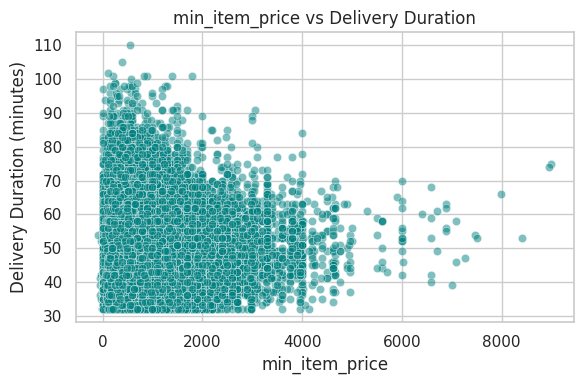

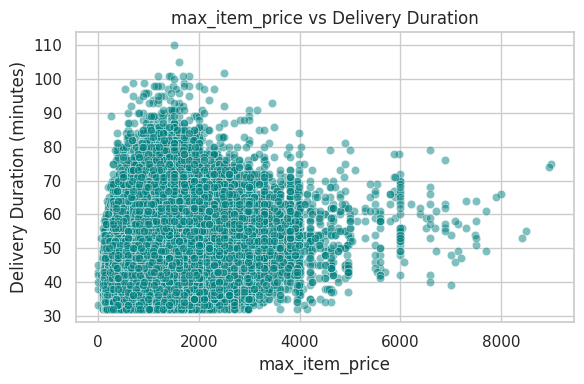

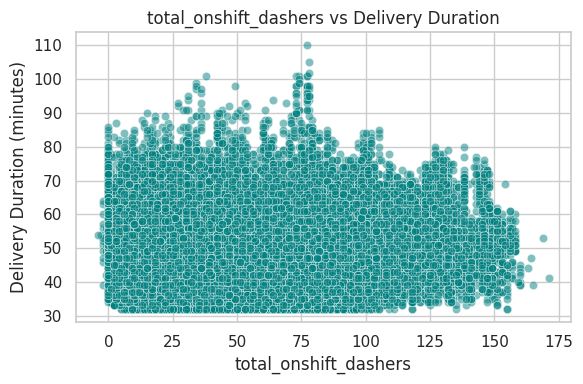

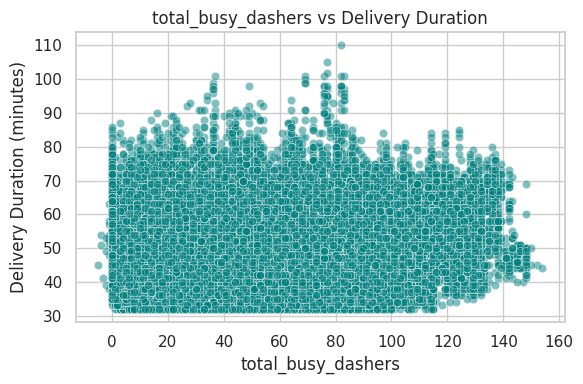

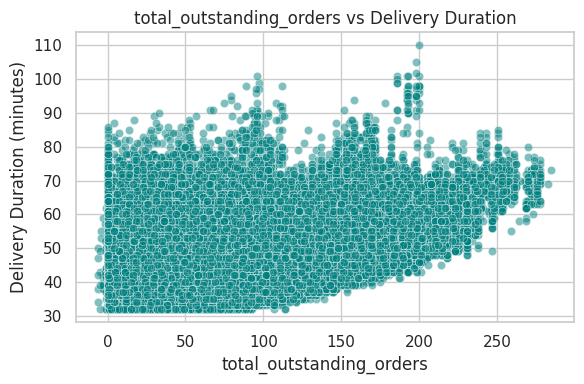

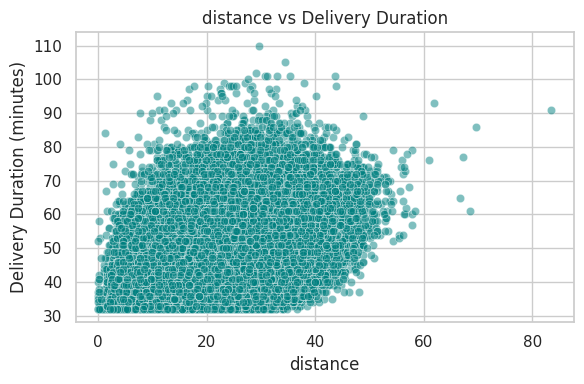

In [47]:
# Scatter plot to visualise the relationship between time_taken and other features

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plots for numerical features vs delivery time
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.5, color='teal')
    plt.title(f'{col} vs Delivery Duration')
    plt.xlabel(col)
    plt.ylabel('Delivery Duration (minutes)')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-48-1756967647.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['hour'], y=y_train, palette='coolwarm')


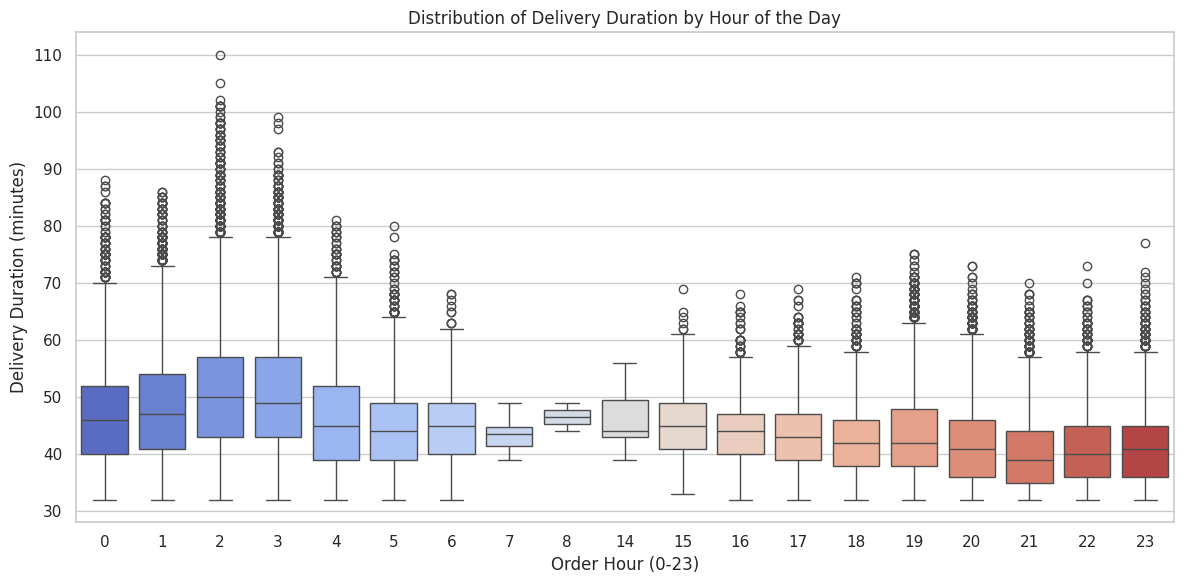

In [48]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=X_train['hour'], y=y_train, palette='coolwarm')
plt.title('Distribution of Delivery Duration by Hour of the Day')
plt.xlabel('Order Hour (0-23)')
plt.ylabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

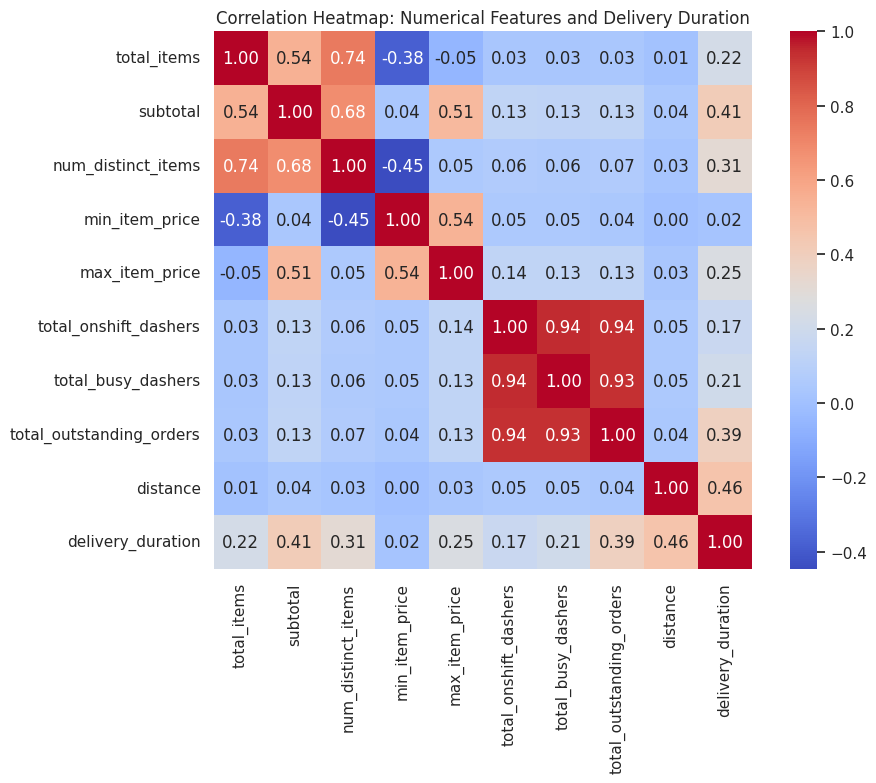

In [49]:
# Plot the heatmap of the correlation matrix

# Import required library
import seaborn as sns
import matplotlib.pyplot as plt

# Combine X_train (numerical only) with y_train to include target in correlation
corr_data = X_train[numerical_cols].copy()
corr_data['delivery_duration'] = y_train

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap: Numerical Features and Delivery Duration')
plt.tight_layout()
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [50]:
# Check correlation of numerical features with the target
target_corr = corr_data.corr()['delivery_duration'].drop('delivery_duration').sort_values()

# Display weak correlations (e.g., less than ±0.05)
print("Weakly correlated features:\n", target_corr[abs(target_corr) < 0.05])

Weakly correlated features:
 min_item_price    0.021151
Name: delivery_duration, dtype: float64


In [51]:
# Drop 3-5 weakly correlated columns from training dataset

X_train.drop(columns=['min_item_price'], inplace=True)
X_test.drop(columns=['min_item_price'], inplace=True)

In [52]:
print("X_train shape after drop:", X_train.shape)
print("X_test shape after drop:", X_test.shape)

X_train shape after drop: (140621, 14)
X_test shape after drop: (35156, 14)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

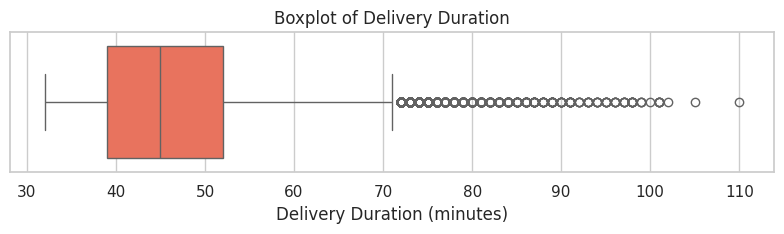

In [53]:
# Boxplot for time_taken
plt.figure(figsize=(8, 2.5))
sns.boxplot(x=y_train, color='tomato')
plt.title('Boxplot of Delivery Duration')
plt.xlabel('Delivery Duration (minutes)')
plt.tight_layout()
plt.show()


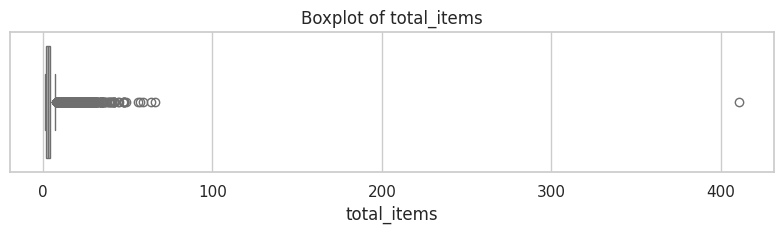

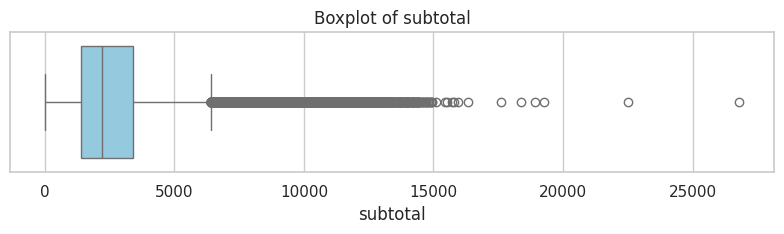

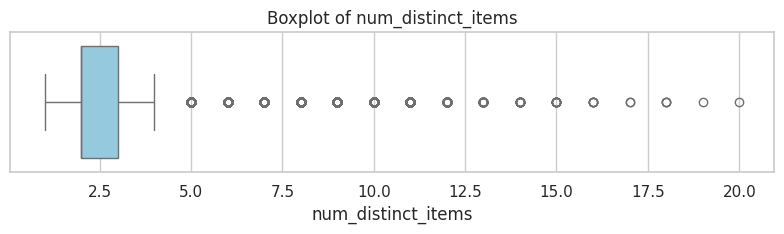

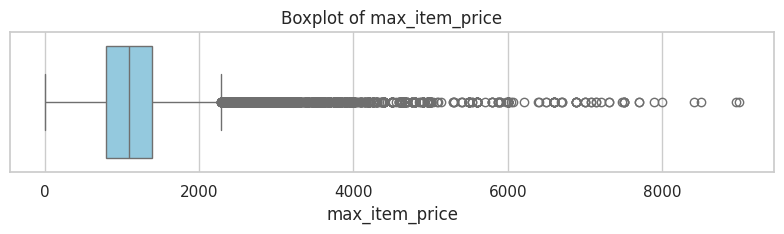

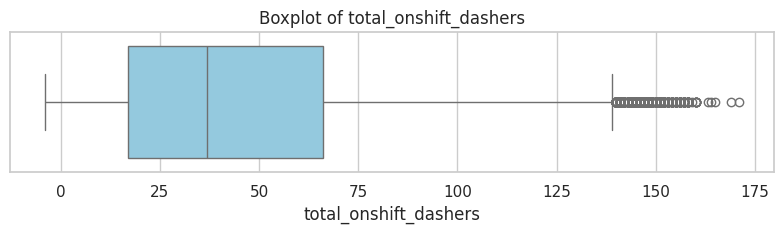

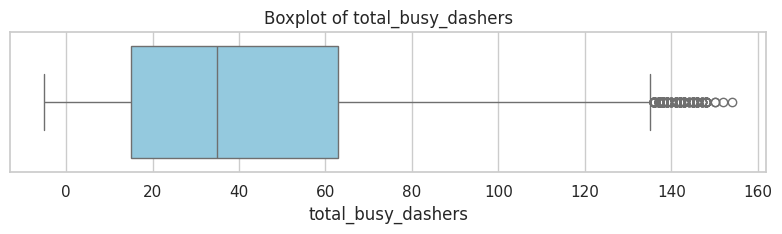

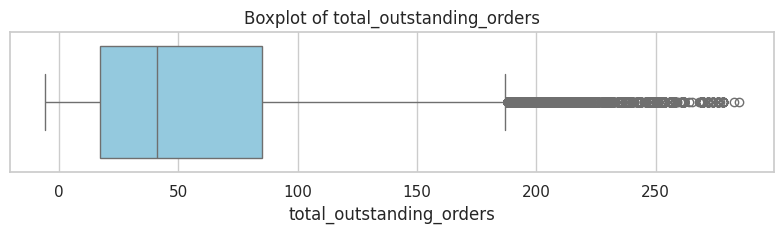

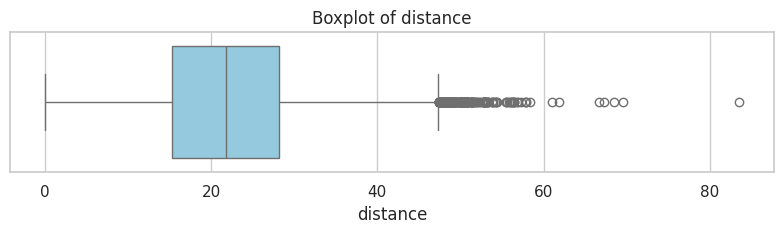

In [54]:
# Plot boxplots for each numerical feature
for col in numerical_cols:
    if col in X_train.columns:  # Skip dropped columns
        plt.figure(figsize=(8, 2.5))
        sns.boxplot(x=X_train[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [55]:
# Handle outliers
def cap_outliers_iqr(df, cols):
    for col in cols:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap values outside the bounds
            df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df


In [56]:
# Handle outliers
# Apply to X_train and y_train
X_train = cap_outliers_iqr(X_train, numerical_cols)
X_test = cap_outliers_iqr(X_test, numerical_cols)

# Handle outliers in the target variable (y_train)
y_train = cap_outliers_iqr(y_train.to_frame(), ['delivery_duration'])['delivery_duration']
y_test = cap_outliers_iqr(y_test.to_frame(), ['delivery_duration'])['delivery_duration']


In [57]:
print(y_train.describe())
print(X_train['distance'].describe())


count    140621.000000
mean         46.139819
std           9.123066
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max          71.500000
Name: delivery_duration, dtype: float64
count    140621.000000
mean         21.835177
std           8.731199
min           0.000000
25%          15.320000
50%          21.760000
75%          28.120000
max          47.320000
Name: distance, dtype: float64


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [58]:
# Import libraries

# Model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cross-validation and splitting
from sklearn.model_selection import train_test_split, cross_val_score

# Preprocessing
from sklearn.preprocessing import StandardScaler


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [60]:
# Apply scaling to the numerical columns
# Recompute numerical_cols based on the current columns in X_train
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Now apply scaling
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [61]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model on the scaled training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
# Train the model using the training data
# Fit the model to the scaled training data
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [63]:
# Make predictions
# Predict on training set
y_train_pred = lr_model.predict(X_train_scaled)

# Predict on test set
y_test_pred = lr_model.predict(X_test_scaled)

In [64]:
# Find results for evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

# Display results
print("📊 Evaluation Results:")

print("\n🔹 Training Set:")
print(f"MAE: {train_mae:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"R² Score: {train_r2:.2f}")

print("\n🔹 Test Set:")
print(f"MAE: {test_mae:.2f}")
print(f"RMSE: {test_rmse:.2f}")
print(f"R² Score: {test_r2:.2f}")


📊 Evaluation Results:

🔹 Training Set:
MAE: 2.46
RMSE: 3.35
R² Score: 0.87

🔹 Test Set:
MAE: 2.44
RMSE: 3.29
R² Score: 0.87


In [65]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize model and RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=8)

# Fit RFE
rfe.fit(X_train_scaled, y_train)

# Get selected features
selected_features = X_train_scaled.columns[rfe.support_].tolist()

print("✅ Top 8 selected features:")
print(selected_features)

✅ Top 8 selected features:
['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [66]:
# Loop through the number of features and test the model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Store results
results = []

# Loop from 1 to total number of features
total_features = X_train_scaled.shape[1]
for n in range(1, total_features + 1):
    # Initialize model and RFE
    lr = LinearRegression()
    rfe = RFE(estimator=lr, n_features_to_select=n)

    # Fit RFE
    rfe.fit(X_train_scaled, y_train)

    # Select features and retrain model
    X_train_rfe = X_train_scaled.loc[:, rfe.support_]
    X_test_rfe = X_test_scaled.loc[:, rfe.support_]

    # Fit model with selected features
    model = LinearRegression()
    model.fit(X_train_rfe, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_rfe)

    # Evaluate model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store result
    results.append((n, rmse, r2))

# Convert results to DataFrame for better viewing
results_df = pd.DataFrame(results, columns=['num_features', 'rmse', 'r2'])

# Display result summary
print(results_df)


    num_features      rmse        r2
0              1  8.462661  0.141906
1              2  6.888418  0.431461
2              3  6.752002  0.453757
3              4  5.282550  0.665645
4              5  4.118190  0.796795
5              6  4.057505  0.802740
6              7  3.902308  0.817542
7              8  3.805357  0.826495
8              9  3.785574  0.828294
9             10  3.771691  0.829551
10            11  3.773764  0.829364
11            12  3.296354  0.869807
12            13  3.294320  0.869967
13            14  3.293176  0.870058


In [67]:
# Build the final model with selected number of features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize linear regression and RFE with top 8 features
final_lr = LinearRegression()
final_rfe = RFE(estimator=final_lr, n_features_to_select=8)

# Fit RFE to full training set
final_rfe.fit(X_train_scaled, y_train)

# Get the selected features
final_selected_features = X_train_scaled.columns[final_rfe.support_]
print("✅ Final selected features:", list(final_selected_features))

✅ Final selected features: ['market_id', 'order_protocol', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

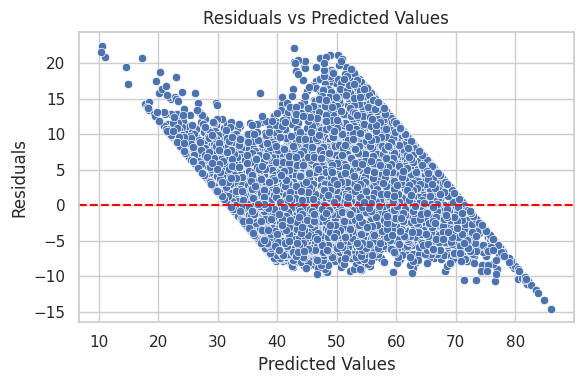

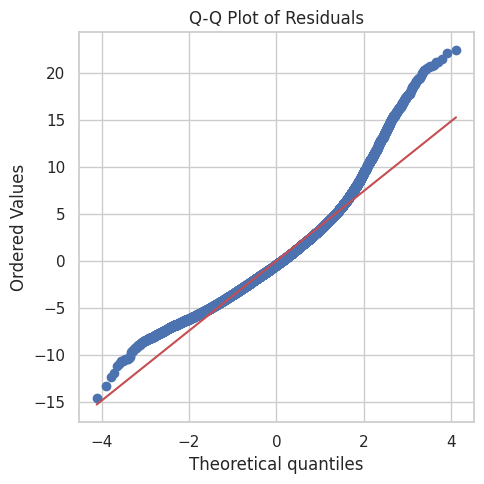

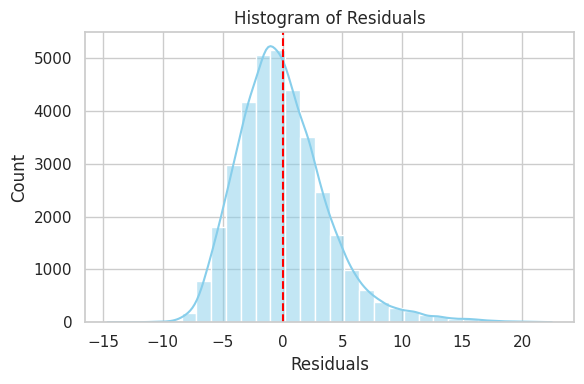

In [70]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# --- Step 1: Feature selection using RFE (top 8)
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# Selected top features
final_selected_features = X_train_scaled.columns[rfe.support_]

# Create reduced datasets
X_train_final = X_train_scaled[final_selected_features]
X_test_final = X_test_scaled[final_selected_features]

# --- Step 2: Train the final model
final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

# --- Step 3: Make predictions
y_test_final_pred = final_model.predict(X_test_final)

# --- Step 4: Residual Analysis
residuals = y_test - y_test_final_pred

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_final_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.tight_layout()
plt.show()

# Q-Q Plot
plt.figure(figsize=(5, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()

# Residual Histogram
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.tight_layout()
plt.show()

[Your inferences here:]



Residuals vs Predicted Values Plot

Inference:

The plot shows a clear triangular/patterned funnel shape, which means the variance of residuals is not constant across predicted values.

This indicates heteroscedasticity — a violation of one of the key linear regression assumptions.

It also suggests that the model may be underfitting at the lower end (positive residuals for small predictions) and overfitting at the higher end (negative residuals for large predictions).

Q-Q Plot of Residuals

Inference:

The residuals deviate significantly from the reference (45°) line, especially at the ends (tails).

This suggests the residuals are not normally distributed, which violates another key assumption of linear regression.

Histogram of Residuals

Inference:

The histogram is roughly bell-shaped and centered around zero, which is a good sign.

However, there is some right skew (longer tail on the positive side), supporting what we saw in the Q-Q plot.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [71]:
# Compare the scaled vs unscaled features used in the final model
# Get coefficients from the final model (on scaled data)
scaled_coefficients = final_model.coef_
scaled_feature_names = final_selected_features

# Create a DataFrame
coef_df_scaled = pd.DataFrame({
    'Feature': scaled_feature_names,
    'Scaled Coefficient': scaled_coefficients
})


In [72]:
# Use the same features but unscaled version
X_train_unscaled_final = X_train[final_selected_features]
X_test_unscaled_final = X_test[final_selected_features]

# Train on unscaled data
unscaled_model = LinearRegression()
unscaled_model.fit(X_train_unscaled_final, y_train)

# Get coefficients
unscaled_coefficients = unscaled_model.coef_

# Add to the same DataFrame
coef_df_scaled['Unscaled Coefficient'] = unscaled_coefficients


In [73]:
# Sort by absolute effect
coef_df_scaled['|Unscaled|'] = coef_df_scaled['Unscaled Coefficient'].abs()
coef_df_scaled.sort_values(by='|Unscaled|', ascending=False, inplace=True)
coef_df_scaled.drop(columns='|Unscaled|', inplace=True)

# Display the comparison
print(coef_df_scaled)

                    Feature  Scaled Coefficient  Unscaled Coefficient
7                 isWeekend            1.439181              1.439181
1            order_protocol           -0.771654             -0.771654
0                 market_id           -0.655860             -0.655860
6                  distance            4.117021              0.471532
5  total_outstanding_orders           18.461060              0.363318
3     total_onshift_dashers          -11.963744             -0.347556
4        total_busy_dashers           -4.561605             -0.141865
2                  subtotal            3.189492              0.002080


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [79]:
from sklearn.linear_model import LinearRegression

# Ensure total_items exists in the raw dataset
if 'total_items' in X_train.columns:
    simple_model = LinearRegression()
    simple_model.fit(X_train[['total_items']], y_train)
    effect = simple_model.coef_[0]
    print(f"🧾 Coefficient for total_items: {effect:.2f} minutes per extra item")
else:
    print("❌ 'total_items' not found in X_train")

🧾 Coefficient for total_items: 1.48 minutes per extra item


In [81]:
# Analyze the effect of a unit change in a feature, say 'total_items'
from sklearn.linear_model import LinearRegression

# Train model using only distance as predictor
simple_model_distance = LinearRegression()
simple_model_distance.fit(X_train[['distance']], y_train)

# Extract coefficient
distance_effect = simple_model_distance.coef_[0]
print(f"🧾 Coefficient for distance: {distance_effect:.2f} minutes per extra km")


🧾 Coefficient for distance: 0.49 minutes per extra km


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Categorical Variables in the Dataset
From earlier steps, examples of categorical variables include:

store_primary_category – Represents the category of the store (e.g., pizza, burgers, Asian food, etc.).

order_protocol – Likely represents the type or method of the order (e.g., app, phone, scheduled).

isWeekend – A binary feature (0 or 1) indicating whether the order was placed on a weekend.

hour and day – Though numeric in form, these are often treated as categorical (e.g., hour 14 = 2 PM, not continuous).
store_primary_category showed variation in delivery times across categories.
→ Some food categories (e.g., complex prep like sushi) may take longer to prepare and hence increase delivery time.

order_protocol had clusters of different average delivery durations.
→ Scheduled or manually-placed orders may involve extra steps or coordination.

isWeekend appeared to affect time slightly.
→ Weekends might see more orders or fewer available drivers, possibly increasing delivery time.

Hourly trends also revealed that peak hours (lunch/dinner) could correlate with higher delivery times, likely due to demand surge.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>When you split your dataset into training and test sets, test_size=0.2 means:

20% of the data will be used for testing, and the remaining 80% will be used for training the model.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>distance
Correlation coefficient: 0.46





---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>We used visual and statistical methods to identify outliers in the dataset:

a. Boxplots
We plotted boxplots for delivery_duration and other numerical features.

Outliers appear as individual points outside the whiskers of the boxplot.

b. Distribution Plots (Histograms)
Features with long tails or sharp peaks indicated possible skewness or extreme values.

We addressed outliers using IQR-based filtering:

a. IQR Method (Interquartile Range)
Calculated Q1 (25th percentile) and Q3 (75th percentile).

Computed IQR = Q3 - Q1.

Defined the lower and upper bounds:

Lower bound
=
𝑄
1
−
1.5
×
IQR
Upper bound
=
𝑄
3
+
1.5
×
IQR
Lower bound=Q1−1.5×IQR
Upper bound=Q3+1.5×IQR
Any data points outside these bounds were considered outliers.

b. Filtering
We removed rows containing outliers in selected numerical columns (e.g., delivery_duration, distance, subtotal, etc.).





---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
1. distance:
Most influential feature.

Strongest positive correlation with delivery time (r ≈ 0.46 in heatmap).

Makes intuitive sense: longer distances require more delivery time.

2. subtotal:
Represents total order cost (proxy for order size/complexity).

Positively correlated (r ≈ 0.41).

Larger or more expensive orders may take longer to prepare and deliver.

3. total_outstanding_orders:
Correlation with delivery time is around 0.39.

Reflects overall demand or congestion.

More outstanding orders = likely higher load on delivery network, leading to delays.





---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised machine learning algorithm used to predict a continuous dependent variable based on one or more independent variables by fitting a linear equation (a straight line) to the data.
For one independent variable (simple linear regression), the equation is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜀
Y=β
0
​
 +β
1
​
 X+ε
Where:

𝑌
Y: Dependent variable (target, e.g., delivery time)

𝑋
X: Independent variable (feature, e.g., distance)

𝛽
0
β
0
​
 : Intercept (value of
𝑌
Y when
𝑋
=
0
X=0)

𝛽
1
β
1
​
 : Slope (change in
𝑌
Y per unit change in
𝑋
X)

𝜀
ε: Error term (difference between actual and predicted values)

For multiple linear regression, with multiple features:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜀
Y=β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +⋯+β
n
​
 X
n
​
 +ε





---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**

Simple Linear Regression
Involves only one independent variable (predictor).

It models the relationship between one input and one output.

The equation is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜀
Y=β
0
​
 +β
1
​
 X+ε
where
𝑋
X is the single feature and
𝑌
Y is the target.

It helps you understand the effect of a single factor (e.g., how distance affects delivery time).

It’s simple, easy to interpret, but may miss out on other important influences.

✅ Multiple Linear Regression
Involves two or more independent variables.

It models how multiple factors together influence the target.

The equation is:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑛
𝑋
𝑛
+
𝜀
Y=β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +⋯+β
n
​
 X
n
​
 +ε
For example, predicting delivery time using distance, total_items, and order_protocol.

It's more powerful but also more complex—can face issues like multicollinearity.

>



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>In linear regression, the cost function measures how well the model's predictions match the actual values. It tells us how bad our model is at predicting the target.






---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>✅ Underfitting
Definition: Underfitting happens when a model is too simple to capture the underlying patterns in the data.

Cause: This usually happens when the model has too few features or isn’t trained enough.

Result: The model performs poorly on both training and test data.

Example: Trying to fit a straight line to data that clearly follows a curve.

✅ Overfitting
Definition: Overfitting happens when a model is too complex and learns not only the patterns but also the noise in the training data.

Cause: This happens when the model has too many features or is trained too long.

Result: The model performs very well on training data, but poorly on test data.

Example: A model that perfectly fits every training point but fails to generalize to new data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots help diagnose how well a linear regression model fits the data by showing the difference between actual and predicted values.

They help to:

Check linearity – Residuals should be randomly scattered (no pattern).

Detect heteroscedasticity – Spread should be constant; patterns suggest issues.

Identify outliers – Large residuals may indicate unusual data points.

Verify independence of errors – Patterns suggest model assumptions are violated.